# Machine Learning for Computer Vision
## Assignment 1 - Group 06

# 1.2 Part 2: Linear basis function models for regression

## 1.2.1 Experimental setup

In [1]:
from packages import *

In [2]:
x = np.linspace(0,5,51)
y = 2*x**2 - 6*x + 1

mu = 0.0
sigma = 4.0
t = y + np.random.randn(51) * sigma + mu

x_trn = x[::8]
y_trn = y[::8]
t_trn = t[::8]

D = 8
phi = np.ones(x_trn.shape[0])

for i in range(1,D+1):
    phi = np.vstack((
        phi,
        x_trn**i
    ))

print(phi.shape)

(9, 7)


### Calculate weight vector - Closed form

In [3]:
def closed_form(data: np.ndarray, target: np.ndarray):

    if data.shape[0] > data.shape[1]:

        # Case M > N
        [U,S,Vt] = np.linalg.svd(data, full_matrices=False)
        # print (U.shape, S.shape, Vt.shape, target.shape)

        # tmp = np.zeros((data.shape[1], data.shape[1]))
        # for i in range(data.shape[1]):
        #     tmp[i,i] = S[i]
        # print(data - (U @ tmp @ Vt) < 0.000000001)
    
        thres = 10**(-12) * S[0]
        Z = np.zeros((data.shape[1], data.shape[1]))

        for i in range(data.shape[1]):
            if S[i] > thres:
                Z[i,i] = 1/S[i]

        # print (U.shape, Z.shape, Vt.T.shape, target.T.shape)
        w = U @ Z @ Vt @ target.T

    else:

        # Case M <= N
        [U,S,Vt] = np.linalg.svd(data.T, full_matrices=False)
        # print (U.shape, S.shape, Vt.shape, target.shape)

        thres = 10**(-12) * S[0]
        Z = np.zeros((data.shape[0], data.shape[0]))

        for i in range(data.shape[0]):
            if S[i] > thres:
                Z[i,i] = 1/S[i]

        # print (Vt.shape, Z.shape, U.T.shape, target.T.shape)
        w = Vt.T @ Z @ U.T @ target.T

    print(w.shape)
    print(w)

    return w

#### Call closed form function

In [4]:
w_trn = closed_form(phi, t_trn)

(9,)
[ 4.57637000e+00 -2.00087321e+01 -1.49064671e+00  7.42197384e+00
  3.85371550e+00 -4.87813046e+00  1.51033322e+00 -1.84406259e-01
  7.31764313e-03]


### RSS (Residual sum of squares)

In [5]:
Ew = sum((t_trn - w_trn.T @ phi)**2)
print('Training rrror: ', Ew)

Training rrror:  1.3970445451618556e-19


### Plot the result

(7,)
(9,)
(9, 7)


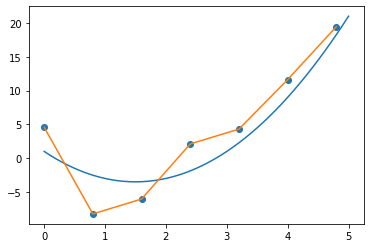

In [6]:
# plot
print(x_trn.shape)
print(w_trn.shape)
print(phi.shape)

# x_hom = np.vstack((np.ones((phi.shape[0]),dtype=int), phi))
# print(x_hom.shape)

pred = w_trn.T @ phi

plt.plot(x,y)
plt.scatter(x_trn, t_trn)
plt.plot(x_trn,pred)

## 1.2.2 Optimization: LMS-learning rule vs. closed form

In [7]:
w_lms = np.zeros(phi.shape[0])
gamma = 1
n_last = 0

# n_last = np.random.randint(0,t_trn.shape[0])
# e_tmp = t[n_last] # - phi[:,rand].T @ w_lms
# w_lms = w_lms + gamma * e_tmp * phi[:,n_last]
 
for k in range(1,500):
    n = np.random.randint(0,t_trn.shape[0])
    e = t[n_last] - phi[:,n_last].T @ w_lms
    w_lms = w_lms + gamma * e * phi[:,n_last]
    w_last = w_lms.copy()
    if (k>2 and all((w_lms - w_last) < 0.00000001)) == True:
        break
    n_last = n
    print(w_lms)


print (f'{k} iterations needed. w = {w_lms}')



[4.57637 0.      0.      0.      0.      0.      0.      0.      0.     ]
[6.96218691 1.90865353 1.52692283 1.22153826 0.97723061 0.78178449
 0.62542759 0.50034207 0.40027366]
3 iterations needed. w = [-7.22224070e+03 -2.31315406e+04 -7.40255107e+04 -2.36885299e+05
 -7.58035888e+05 -2.42571719e+06 -7.76229687e+06 -2.48393515e+07
 -7.94859260e+07]


In [8]:
w_last = w_lms = np.zeros(phi.shape[0])
gamma = 1
n_last = 0

for epoch in range(1,500):
    # for n in range(t_trn.shape[0]):
    E_tmp = sum((t_trn - w_trn.T @ phi)**2)
    w_lms = w_lms - gamma * np.gradient(E_tmp)

ValueError: operands could not be broadcast together with shapes (9,) (0,) 

### Create images

In [ ]:
images = []
# img = np.zeros([29,29])
# print(img.shape)

x_img = np.copy(x) # 51 data points
y_img = np.copy(y) # y = 2x**2 - 6x + 1
t_img = np.copy(y) # NO noise

# print(len(x))
# adding some noise to distort the center of the circles
mu = 15.0
sigma = 2.0
m1 = np.random.randn(len(x_img)) * sigma + mu
m2 = np.random.randn(len(x_img)) * sigma + mu

# print(len(m1))
# print(len(m2))

for num in range(len(x_img)):
    # m1 = 14 + np.random.randn(51) * sigma + mu
    # m2 = 14 + np.random.randn(51) * sigma + mu 
    img = np.zeros([29,29])
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if ((i-m1[num])**2 +(j-m2[num])**2 - (3*x_img[num])**2) < 0:
                img[i,j] = 1
                
    images.append(img)

# for i in range(len(images)):
#     plt.imshow(images[i],  cmap='gray')
#     plt.show()

### Reshape images and compute closed form

In [ ]:
images = np.array(images)
img_data = images.reshape(images.shape[0],-1).T

x_data_trn = img_data[:,::8]
y_img_trn = y_img[::8]

w_img_data = closed_form(x_data_trn , y_img_trn)

In [ ]:
predi = w_img_data @ x_data_trn

plt.plot(x,predi)

plt.plot(x,y)
# plt.scatter(x_data_trn, y_img_trn)
# plt.plot(x_data_trn,predi)